# Sharpen
Try to sharpen images

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/M_DV_V2022

Mounted at /content/gdrive
/content/gdrive/MyDrive/M_DV_V2022


### Imports

In [140]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, \
                         UpSampling2D, Conv2DTranspose, MaxPooling2D, \
                         Dropout

### Load data

In [103]:
X = np.load("X_data.npy")
y = np.load("y_data.npy")

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [90]:
snitt = X_train.mean()
var = X_train.var()

snitt_y = y_train.mean()
var_y = y_train.var()

#X_train = (X_train - snitt) / var
#X_test = (X_test - snitt) / var

#y_train = (y_train - snitt_y) / var_y
#y_test = (y_test - snitt_y) / var_y

### Make model

In [155]:
model = Sequential()

model.add(Input(shape=(60,60,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu',
                     padding='valid'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, kernel_size=3, activation='relu',
                padding='same'))
model.add(UpSampling2D(5))
model.add(Conv2D(32, kernel_size=3, activation='relu',
                 padding='valid'))
model.add(Conv2D(32, kernel_size=3, activation='relu',
                 padding='same'))
model.add(MaxPooling2D(2))
model.add(UpSampling2D(2))

model.add(Conv2D(1, kernel_size=3, activation='linear',
                 padding='valid'))

#model.add(Conv2DTranspose(32, kernel_size=3, padding="same"))
#model.add(UpSampling2D(3))

model.summary()
model.compile(optimizer='adam',
              loss='mse')

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_538 (Conv2D)         (None, 58, 58, 32)        320       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 29, 29, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_539 (Conv2D)         (None, 29, 29, 32)        9248      
                                                                 
 up_sampling2d_90 (UpSamplin  (None, 145, 145, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_540 (Conv2D)         (None, 143, 143, 32)      9248      
                                                                 
 conv2d_541 (Conv2D)         (None, 143, 143, 32)    

## Train model

In [156]:
history = model.fit(X_train,y_train,
                    validation_data=(X_test,y_test),
                    epochs=200, batch_size=10)

Epoch 1/200
4/4 [==============================] - 1s 114ms/step - loss: 3182.4585 - val_loss: 1223.4565
Epoch 2/200
4/4 [==============================] - 0s 59ms/step - loss: 1476.8602 - val_loss: 972.4075
Epoch 3/200
4/4 [==============================] - 0s 54ms/step - loss: 1106.1971 - val_loss: 1104.6552
Epoch 4/200
4/4 [==============================] - 0s 53ms/step - loss: 1114.8054 - val_loss: 933.0124
Epoch 5/200
4/4 [==============================] - 0s 51ms/step - loss: 1022.4422 - val_loss: 1014.5729
Epoch 6/200
4/4 [==============================] - 0s 54ms/step - loss: 1001.0184 - val_loss: 922.3058
Epoch 7/200
4/4 [==============================] - 0s 51ms/step - loss: 996.3746 - val_loss: 897.8143
Epoch 8/200
4/4 [==============================] - 0s 53ms/step - loss: 950.9201 - val_loss: 894.1710
Epoch 9/200
4/4 [==============================] - 0s 54ms/step - loss: 943.1212 - val_loss: 870.7879
Epoch 10/200
4/4 [==============================] - 0s 54ms/step - loss:

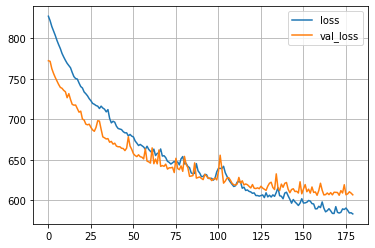

In [157]:
plt.plot(history.history['loss'][20:], label="loss")
plt.plot(history.history['val_loss'][20:], label="val_loss")
plt.legend()
plt.grid()

Text(0.5, 1.0, 'Predicted')

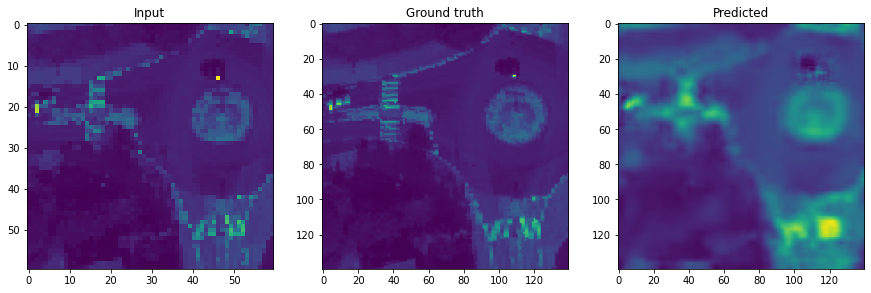

In [158]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3, figsize = (15,15))
ax1.imshow(X_test[2:3][0][:,:,0])
ax1.set_title("Input")
ax2.imshow(y_test[2:3][0][:,:,0])
ax2.set_title("Ground truth")
ax3.imshow(model.predict(X_test[2:3])[0][:,:,0])
ax3.set_title("Predicted")